In [ ]:
import pandas as pd
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Đếm số dòng số liệu
df.count()

,0
Time,284807
V1,284807
V2,284807
V3,284807
V4,284807
V5,284807
V6,284807
V7,284807
V8,284807
V9,284807


In [ ]:
#Số dữ liệu cột class
df['Class'].value_counts()

,count
Class,
0,284315
1,492


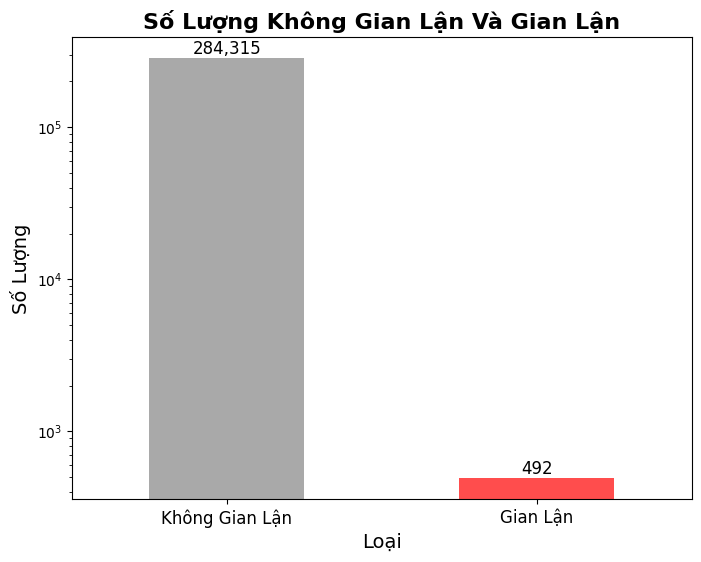

In [ ]:
import matplotlib.pyplot as plt

# Trực quan hóa dữ liệu
class_counts = df['Class'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))


# Vẽ biểu đồ với các cột có màu sắc rõ ràng hơn
class_counts.plot(kind='bar', color=['#A9A9A9', '#ff4d4d'])

# Thêm tiêu đề và nhãn
plt.title('Số Lượng Không Gian Lận Và Gian Lận', fontsize=16, fontweight='bold')
plt.xlabel('Loại', fontsize=14)
plt.ylabel('Số Lượng', fontsize=14)
plt.yscale('log')

# Tùy chỉnh nhãn trên trục X
plt.xticks(ticks=[0, 1], labels=['Không Gian Lận', 'Gian Lận'], rotation=0, fontsize=12)

# Hiển thị giá trị chính xác trên đầu mỗi cột
for i in range(len(class_counts)):
    ax.text(i, class_counts[i], f'{class_counts[i]:,}', ha='center', va='bottom', fontsize=12)

# Hiển thị biểu đồ
plt.show()

In [ ]:
#Loại bỏ cột Time vì nó không có giá trị khi phân tích
df_no_time = df.drop(['Time'], axis=1)
df_no_time.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Chuẩn hóa dữ liệu cột Amount
from sklearn.preprocessing import StandardScaler
df_no_time['Amount'] = StandardScaler().fit_transform(df_no_time['Amount'].values.reshape(-1, 1))
df_no_time.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
#Phân chia dữ liệu train test
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_no_time, test_size=0.3, random_state=42)
#Điều chế dữ liệu
X_train = X_train[X_train['Class'] == 0]
X_train = X_train.drop(['Class'], axis=1)
#Điều chế X_test
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train=X_train.values
X_test=X_test.values

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(199008, 29)
(85443, 29)
(85443,)


In [ ]:
# Sử dụng AutoEncoder
from keras.models import load_model, Model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint

input_dimension = X_train.shape[1]
hidden_size =128
input_layer = Input(shape=(input_dimension,))
#Encoder
encoder = Dense(hidden_size, activation='relu')(input_layer)
encoder = Dense(int(hidden_size//2), activation='relu')(encoder)
encoder = Dense(int(hidden_size//4), activation='relu')(encoder)
#Decoder
decoder = Dense(int(hidden_size//4), activation='relu')(encoder)
decoder = Dense(int(hidden_size//2), activation='relu')(decoder)
decoder = Dense(hidden_size, activation='relu')(decoder)

#output
output_layer = Dense(input_dimension, activation='relu')(decoder)

auto_encoder_model = Model(inputs=input_layer, outputs=output_layer)
auto_encoder_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
auto_encoder_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,405 (114.86 KB)

 Trainable params: 29,405 (114.86 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
#Train model
n_epochs =50
n_batch_size = 32
save_best = ModelCheckpoint(filepath="/content/drive/MyDrive/HoiQuyLogic/best.keras",
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True)
history = auto_encoder_model.fit(X_train, X_train,
                                 batch_size=n_batch_size,
                                 epochs=n_epochs,
                                 verbose=1,
                                 shuffle=True,
                                 callbacks=[save_best],
                                 validation_data=(X_test, X_test))
#

Epoch 1/50
6214/6219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7306 - loss: 0.6920
Epoch 1: val_loss improved from inf to 0.67572, saving model to /content/drive/MyDrive/HoiQuyLogic/best.keras
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.7307 - loss: 0.6920 - val_accuracy: 0.7814 - val_loss: 0.6757
Epoch 2/50
6204/6219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8427 - loss: 0.6248
Epoch 2: val_loss improved from 0.67572 to 0.65164, saving model to /content/drive/MyDrive/HoiQuyLogic/best.keras
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8427 - loss: 0.6248 - val_accuracy: 0.8723 - val_loss: 0.6516
Epoch 3/50
6202/6219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8652 - loss: 0.6351
Epoch 3: val_loss improved from 0.65164 to 0.65026, saving model to /content/drive/MyDrive/HoiQuyLogic/best.keras
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8652 - loss: 0.6351 - val_accuracy: 0.8832 - val_loss: 0.6503
Epoch 4/50
6211/6219 ━━━━━━━━━━━━━━━━━

In [ ]:
#Kiểm tra việc tái tạo trong tập test
import numpy as np

# dự đoán
predicts = auto_encoder_model.predict(X_test)
# tính loss(lỗi tái tạo từ AutoEnCoder)
mse = np.mean(np.power(X_test - predicts, 2), axis=1)
err_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2671/2671 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


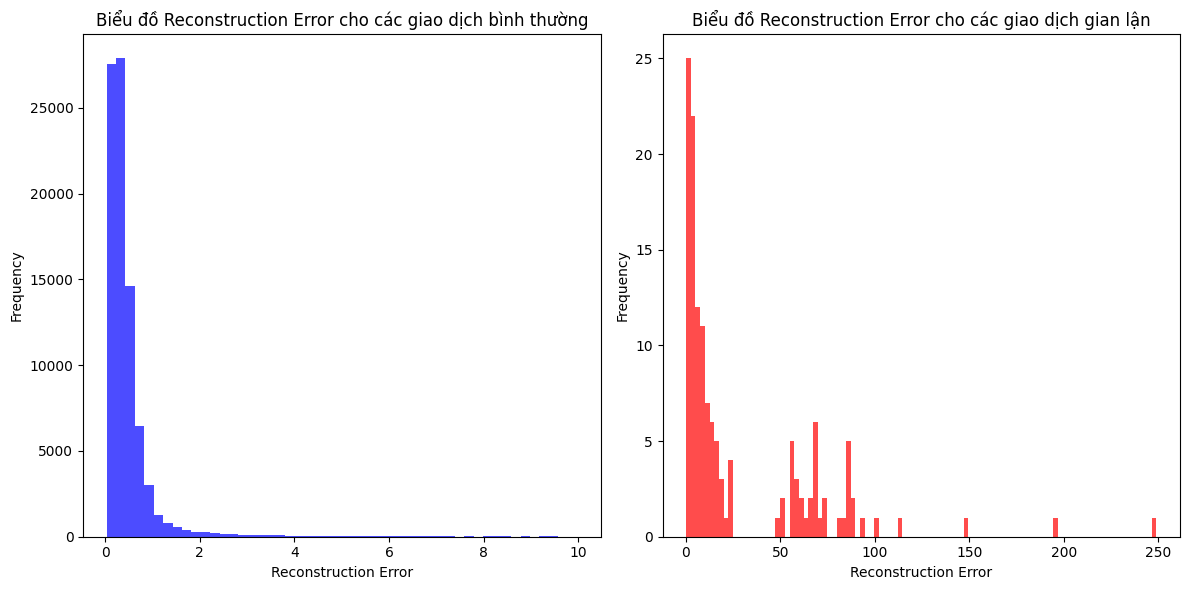

[73.92893685  0.79738354  0.1675769  ...  0.45257658  0.23130937
  0.12965834]
        reconstruction_error  true_class
43428              73.928937           1
49906               0.797384           0
29474               0.167577           0
276481              0.336424           0
278846              0.138779           0
...                      ...         ...
180795              0.804211           0
259979              0.221195           0
21885               0.452577           0
217812              0.231309           0
86348               0.129658           0

[85443 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dự đoán lỗi tái tạo bằng Autoencoder
predicts = auto_encoder_model.predict(X_test)
mse = np.mean(np.power(X_test - predicts, 2), axis=1)
err_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})

# In ra histogram của error khi tái tạo các điểm Normal trong tập test
normal_error_df = err_df[(err_df['true_class'] == 0) & (err_df['reconstruction_error'] < 10)]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(normal_error_df.reconstruction_error.values, bins=50, color='blue', alpha=0.7)
plt.title('Biểu đồ Reconstruction Error cho các giao dịch bình thường')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')

# In ra histogram của error khi tái tạo các điểm Fraud trong tập test
fraud_error_df = err_df[err_df['true_class'] == 1]
plt.subplot(1, 2, 2)
plt.hist(fraud_error_df.reconstruction_error.values, bins=100, color='red', alpha=0.7)
plt.title('Biểu đồ Reconstruction Error cho các giao dịch gian lận')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
print(mse)
print(err_df)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
import numpy as np

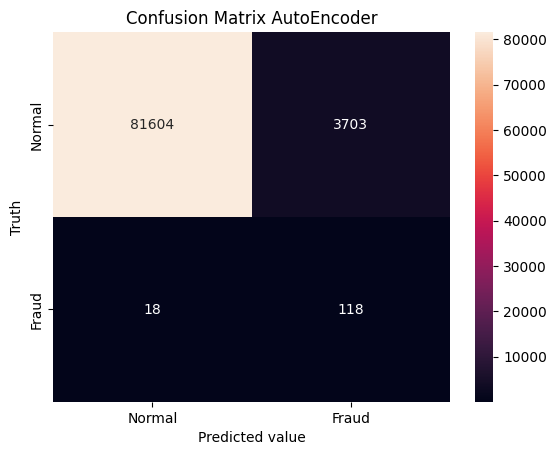

1.4264206767082193


In [ ]:
#Vẽ ra confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Vì dữ liệu bất thường nhỏ hơn 5% sử dụng phân vị 95% để làm ngưỡng
threshold = np.percentile(predicts, 95)


y_pred = [1 if e > threshold else 0 for e in err_df.reconstruction_error.values]
conf_matrix = confusion_matrix(err_df.true_class, y_pred)

sns.heatmap(conf_matrix, xticklabels = ["Normal", "Fraud"], yticklabels =["Normal", "Fraud"], annot=True, fmt='d')
plt.title("Confusion Matrix AutoEncoder")
plt.ylabel('Truth')
plt.xlabel('Predicted value')
plt.show()
print(threshold)

In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Chuẩn bị dữ liệu cho SMOTE từ lỗi tái tạo và true_class
X_train_lr = pd.DataFrame({'reconstruction_error': mse})
y_train_lr = err_df['true_class']

# Áp dụng SMOTE để tạo dữ liệu cân bằng
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_lr, y_train_lr)

# Huấn luyện Logistic Regression trên dữ liệu đã qua SMOTE
log_reg = LogisticRegression()
log_reg.fit(X_resampled, y_resampled)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LogisticRegression()

<ipython-input-50-cdcdf981274b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')


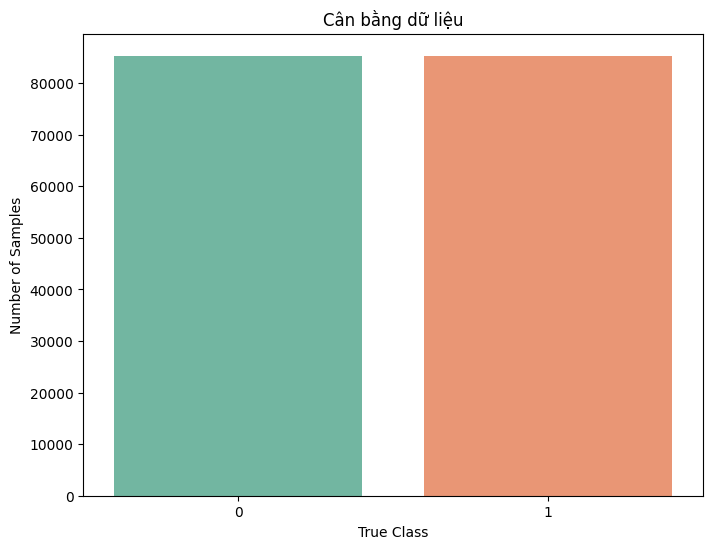

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo một DataFrame mới từ y_resampled để dễ vẽ biểu đồ
resampled_df = pd.DataFrame(y_resampled, columns=['true_class'])

# Đếm số lượng mẫu mỗi lớp sau khi SMOTE
class_counts = resampled_df['true_class'].value_counts()

# Vẽ biểu đồ cột để hiển thị số lượng mẫu của mỗi lớp
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Cân bằng dữ liệu')
plt.xlabel('True Class')
plt.ylabel('Number of Samples')

# Hiển thị biểu đồ
plt.show();


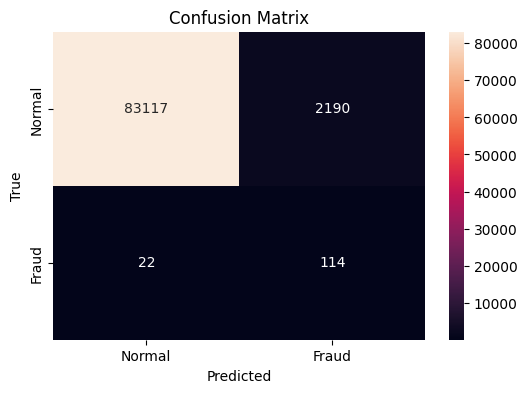

In [55]:
# Dự đoán trên tập test
y_pred1 = log_reg.predict(X_train_lr)

# Tính toán ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_train_lr, y_pred1)

# Vẽ ma trận nhầm lẫn
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"], annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


In [ ]:
# True Positive: 114
# True Negative: 83117
# False Positve: 2190
# False Negative: 22
# Accuracy: 0.9741113959013611
# Precision: 0.049479166666666664
# Recall: 0.8382352941176471
# F1 Score: 0.09344262295081968